<a href="https://colab.research.google.com/github/veraluciatavares/Data_driven_insights.ipynb/blob/main/Data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

from google.colab import files
uploaded = files.upload()

Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time.csv


In [3]:
#a escolha do meus dados foi baseado no tempo de tela de criancas indianas
#importei algumas bibliotecas como por exemplo: pandas,numpy,matplotlib
#os prints mostra,as linhas,colunas,corpo,o tipo da str

In [4]:
df = pd.read_csv('Indian_Kids_Screen_Time.csv')
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)


   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     Poor Sleep, Anx

In [5]:
#usando o dataframe eu escolhe a coluna "gender" que o sexo de cada crianca

In [18]:
nome = list(df['Gender'])
for nomes in nome[:5]:
  print(nomes)

Male
Female
Female
Female
Female


In [7]:
genero = df['Gender']
print(genero.head())

0      Male
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object


In [ ]:
#contagem de genero

In [8]:
contagem = df['Gender'].value_counts()
print('total de meninos',contagem['Female'])
print('total de meninas',contagem['Male'])

total de meninos 4770
total de meninas 4942


In [ ]:
#com o .values_counts descobrimos que temos mais meninos que meninas nesse dado

In [ ]:
##dicionario tempo de tela e qual aparelho usado
#no indice geral o aparelho que tem mais hora de tela e o laptop,em segundo e o celular,em terceiro a TV

In [10]:
dicionario =dict(zip(df['Avg_Daily_Screen_Time_hr'][:3],df['Primary_Device'][:3]))
print(dicionario)

{3.99: 'Smartphone', 4.61: 'Laptop', 3.73: 'TV'}


In [ ]:
##tuplas

In [11]:
linha0 = df.iloc[0]
minha_tupla = linha0['Age'],linha0['Gender'],linha0['Primary_Device']
print(minha_tupla)

(np.int64(14), 'Male', 'Smartphone')


In [ ]:
##observei que a maior quantia de crianca excedem o tempo de tela e menino com o uso de celular

In [12]:
#estruturas condicionais e de laços

coluna_numerica = 'Avg_Daily_Screen_Time_hr'
primeiro_valor = df[coluna_numerica][0]
if primeiro_valor >5.89:
  print('maior tempo de tela')
elif primeiro_valor > 3.98:
  print('tempo medio de tela')
else:
  print('menor tempo')
#a estrutura mostrou que o tempo medio tela e 3.99


#o for fooi ultilizado para a soma dos 5 primeiros numeros
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
   soma += n
print('soma dos 5 primeiros valores',soma)


#ultilizando o while verificamos que nenhum valor maior que o limite nos 5 primeiros numeros
limite = 5.89
i = 0
while i < len(lista) and lista[i]<= limite:
  i += 1
if i <len(lista):
  print('primeiro valor >',limite,'encontrado',lista[i])
else:
  print('nenhum maior que',limite,'encontrado nos primeiros 5 valores')


##analisando essa coluna mostrou que a soma de tempo de tela resultou em quase 20 horas,e o tempo medio por criancas foi de quase 4 horas
#mas que nao excedeu o limite máximo de tempo que segue sendo de 5.89





tempo medio de tela
soma dos 5 primeiros valores 19.430000000000003
nenhum maior que 5.89 encontrado nos primeiros 5 valores


In [13]:
if 'Avg_Daily_Screen_Time_hr' in df.columns and 'Educational_to_Recreational_Ratio' in df.columns:
    df['diferenca'] = df['Avg_Daily_Screen_Time_hr'] - df['Educational_to_Recreational_Ratio']
print(df[['Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio','diferenca']].head())


   Avg_Daily_Screen_Time_hr  Educational_to_Recreational_Ratio  diferenca
0                      3.99                               0.42       3.57
1                      4.61                               0.30       4.31
2                      3.73                               0.32       3.41
3                      1.21                               0.39       0.82
4                      5.89                               0.49       5.40


In [ ]:
#ao criar uma coluna entre o tempo de tela e o tempo de uso de tela para recreação educacional notei que o maximo de tempo e de menos de 50 minutos
#mostrando que tem pouco aproveitamento educativo com o tempo ao todo

In [14]:
#arrays

array = np.array(df['Avg_Daily_Screen_Time_hr'])

array_dividindo = array//4
array_subtraindo = array - 0.49

print(array[:5])
print(array_dividindo[:5])
print(array_subtraindo[:5])

print('mesmo dividindo o array por 4',array_dividindo)
print('a subtração do array por 0.49',array_subtraindo)

[3.99 4.61 3.73 1.21 5.89]
[0. 1. 0. 0. 1.]
[3.5  4.12 3.24 0.72 5.4 ]
mesmo dividindo o array por 4 [0. 1. 0. ... 1. 1. 1.]
a subtração do array por 0.49 [3.5  4.12 3.24 ... 5.13 5.11 5.63]


In [ ]:
#mesmo dividind0 o tempo de tela por 4 periodos de tempo ainda tem crianca que exede quase uma hora so de tempode tela sem finalidade educativa
#subtraindo o tempo maximo de aproveitamento educativo mostra que e preocupante pois esta atrapalhando o tempo de sono e apresentam problemas para dormir

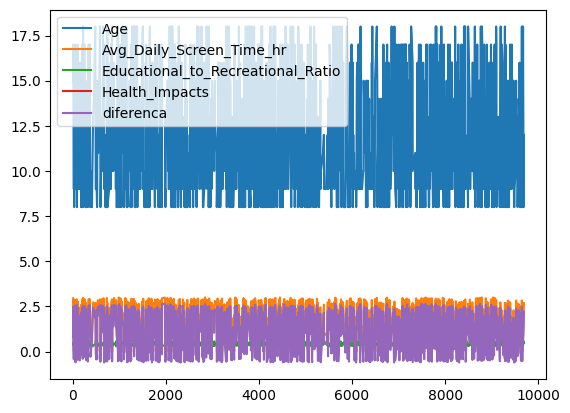

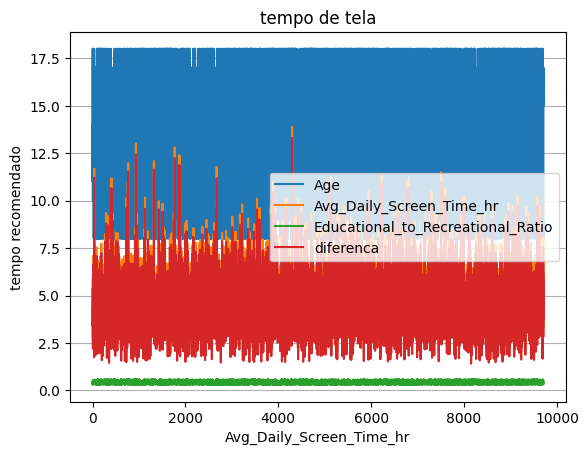

In [15]:
if 'Avg_Daily_Screen_Time_hr' in df.columns:
  df.groupby('Exceeded_Recommended_Limit').plot(kind='line')
  plt.title('tempo de tela')
  plt.xlabel('Avg_Daily_Screen_Time_hr')
  plt.ylabel('tempo recomendado')
  plt.grid(True, axis='y')
  plt.xticks(rotation=0)
  plt.show()
#grafico de linhas

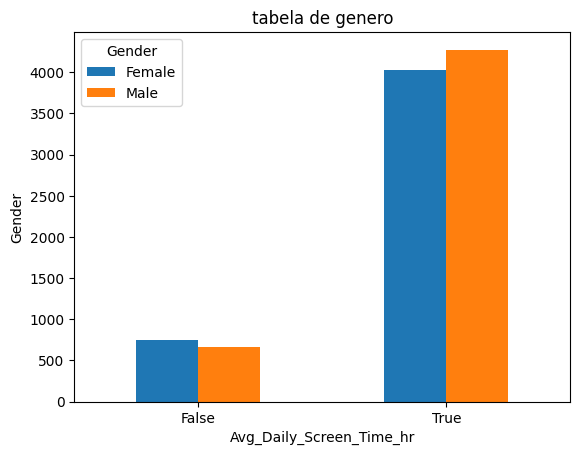

In [16]:
#gráfico de barras

if 'Avg_Daily_Screen_Time_hr' in df.columns and 'Gender' in df.columns:
  df.groupby(['Exceeded_Recommended_Limit','Gender']).size().unstack().plot(kind='bar')
  plt.title('tabela de genero')
  plt.xlabel('Avg_Daily_Screen_Time_hr')
  plt.ylabel('Gender')
  plt.xticks(rotation=0)
  plt.show()

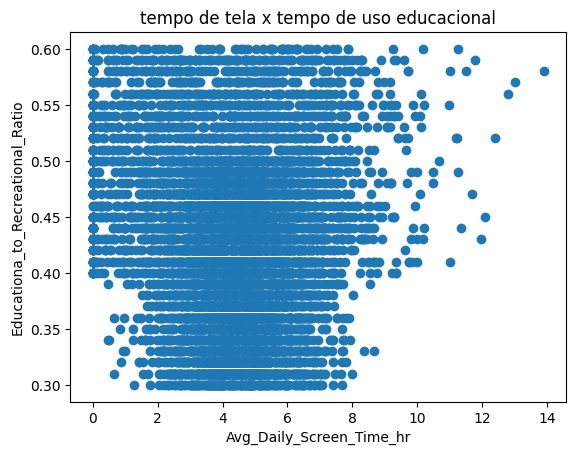

In [17]:
#numerico
import matplotlib.pyplot as plt
if 'Avg_Daily_Screen_Time_hr' in df.columns and 'Educational_to_Recreational_Ratio' in df.columns:
  plt.scatter(df['Avg_Daily_Screen_Time_hr'],df['Educational_to_Recreational_Ratio'])
  plt.title('tempo de tela x tempo de uso educacional')
  plt.xlabel('Avg_Daily_Screen_Time_hr')
  plt.ylabel('Educationa_to_Recreational_Ratio')
  plt.show()


In [ ]:
#no gráfico de linhas podemos analisar que de forma visual o quanto e descrepante o tempo de tela para recreação e para fins educativos
#no graficos de barra mostrou que o genero das criancas meninos/meninas tem uma pequena diferenca na quantidade,e que umpequeno grupo faz um uso de tempo aceitavel de tela
#o grafigo numérico mostra que mesmo usando mais de 10 horas de tela por dia nem sempre e para fins educacionais

nesse projeto 'Indian_Kids_Screen_Tim.csv pude explorar os dados de tempo de tela de crianças indianas,foi possível notar que o tempo de tela excede o limite adequado,essas crianças são da area urbana,que por causa do tempo excessivo de tela,algumas tem o tempo de sono comprometido,e que algumas até desenvolveu ansiedade,obsevei que a maioria são meninos,porém o tempo de tela e nedio igual para ambas partes,mesmo chegando a mais de 9 horas de tela,o tempo para fins educacional e extremamente baixo,sem muito aproveitamento educativo.